In [1]:

import numpy as np
import os, sys
import h5py
import pandas as pd
import matplotlib.pyplot as plt

import datetime
sys.path.append('/Users/ajc/Core/SimDataInputs/ats-repo/ats-Aug6/tools/utils/')
sys.path.append('/Users/ajc/Core/PostProcessData/PyScript')
import readdata as rd
import parse_ats, transect_data

import datetime as DT
import matplotlib.dates as mdates

In [2]:
outfile = '/Users/ajc/Core/PostProcessData/BarrowTransect/NGEE/Temperature-SiteC/'

In [3]:
infile = '/Users/ajc/Core/SimDataInputs/observed_data_barrow/Vladimir-Data/Area_C/'
save = False

dataset1= 'NGEE_BRW_C_2012-09-09_2013-09-30_Thermal_Transect_and_Borehole.csv' # 2012-13
dataset2= 'NGEE_BRW_C_2013-10-01_2014-09-30_Thermal_Transect_and_Borehole.csv' # 2013-14
dataset3= 'NGEE_BRW_C_2014-10-01_2015-09-30_Thermal_Transect_and_Borehole.csv' # 2014-15
dataset4= 'NGEE_BRW_C_2015-10-01_2016-09-30_Thermal_Transect_and_Borehole.csv' # 2015-16
#dataset5= 'NGEE_BRW_C_2016-10-01_2017-09-30_Thermal_Transect_and_Borehole.csv' # 2014-15

time_origin = datetime.datetime(2010,1,1,0,0,0)

infile_observed1 = infile + dataset1
infile_observed2 = infile + dataset2
infile_observed3 = infile + dataset3
infile_observed4 = infile + dataset4
#infile_observed5 = infile + dataset5
data1 = pd.read_csv(infile_observed1, skiprows=5)
data2 = pd.read_csv(infile_observed2, skiprows=5)
data3 = pd.read_csv(infile_observed3, skiprows=5)
data4 = pd.read_csv(infile_observed4, skiprows=5)
#data5 = pd.read_csv(infile_observed5, skiprows=5)

DataObserved2012 = dict()
DataObserved2013 = dict()
DataObserved2014 = dict()
DataObserved2015 = dict()
DataObserved2016 = dict()
start_year = 2010
for c in data1.columns:
    k = -100
    if 'trough' in c or 'center' in c or 'rim' in c:
        k = int(float(c[6:10])*100)
        dat = np.array([ x + 273.15  for x in data1[c]])
        d = np.array([dat[i-1] if np.isnan(x) else x for i,x in enumerate(dat)])
        
    if 'trough' in c:
        DataObserved2012['temperature-trough-%scm'%k] = d
    elif 'center' in c and not 'off' in c :
        DataObserved2012['temperature-center-%scm'%k] = d
    elif 'rim' in c and 'rim2' not in c:
        if k > 2:
            k = k + 1*0
        DataObserved2012['temperature-rim-%scm'%k] = d
        
    if 'Time' in c:
        time1 = [pd.to_datetime(data1['Timestamp'])]
        time = [(t - time_origin).dt.total_seconds()/86400 for t in time1]
        Time = np.array([start_year + t/365. for t in time[0]])
        #Time = np.array([t for t in time[0]])
        DataObserved2012['time'] = np.array(Time)
        DataObserved2012['time_yr'] = [2010 + t/365 for t in Time]

for c in data2.columns:
    k = -100
    if 'trough' in c or 'center' in c or 'rim' in c:
        k = int(float(c[6:10])*100)
        dat = np.array([ x + 273.15  for x in data2[c]])
        d = np.array([dat[i-1] if np.isnan(x) else x for i,x in enumerate(dat)])
    if 'trough' in c:
        DataObserved2013['temperature-trough-%scm'%k] = d
    elif 'center' in c and not 'off' in c :
        DataObserved2013['temperature-center-%scm'%k] = d
    elif 'rim' in c and 'rim2' not in c:
        DataObserved2013['temperature-rim-%scm'%k] = d
    if 'Time' in c:
        time1 = [pd.to_datetime(data2['Timestamp'])]
        time = [(t - time_origin).dt.total_seconds()/86400 for t in time1]
        Time = np.array([start_year +t/365. for t in time[0]])
        #Time = np.array([t for t in time[0]])
        DataObserved2013['time'] = np.array(Time)
        DataObserved2013['time_yr'] = [2010 + t/365 for t in Time]
    
for c in data3.columns:
    k = -100
    if 'trough' in c or 'center' in c or 'rim' in c:
        k = int(float(c[6:10])*100)
        dat = np.array([ x + 273.15  for x in data3[c]])
        d = np.array([dat[i-1] if np.isnan(x) else x for i,x in enumerate(dat)])
    if 'trough' in c:
        DataObserved2014['temperature-trough-%scm'%k] = d
    elif 'center' in c and not 'off' in c :
        DataObserved2014['temperature-center-%scm'%k] = d
    elif 'rim' in c and 'rim2' not in c:
        DataObserved2014['temperature-rim-%scm'%k] = d
    if 'Time' in c:
        time1 = [pd.to_datetime(data3['Timestamp'])]
        time = [(t - time_origin).dt.total_seconds()/86400 for t in time1]
        Time = np.array([start_year +t/365. for t in time[0]])
        #Time = np.array([t for t in time[0]])
        DataObserved2014['time'] = np.array(Time)
        DataObserved2014['time_yr'] = [2010 + t/365 for t in Time]

for c in data4.columns:
    k = -100
    if 'trough' in c or 'center' in c or 'rim' in c:
        k = int(float(c[6:10])*100)
        dat = np.array([ x + 273.15  for x in data4[c]])
        d = np.array([dat[i-1] if np.isnan(x) else x for i,x in enumerate(dat)])
    if 'trough' in c:
        DataObserved2015['temperature-trough-%scm'%k] = d
    elif 'center' in c and not 'off' in c :
        DataObserved2015['temperature-center-%scm'%k] = d
    elif 'rim' in c and 'rim2' not in c:
        if k > 2:
            k = k + 1*0
        DataObserved2015['temperature-rim-%scm'%k] = d
        
    if 'Time' in c:
        time1 = [pd.to_datetime(data4['Timestamp'])]
        time = [(t - time_origin).dt.total_seconds()/86400 for t in time1]
        Time = np.array([start_year +t/365. for t in time[0]])
        #Time = np.array([t for t in time[0]])
        DataObserved2015['time'] = np.array(Time)
        DataObserved2015['time_yr'] = [2010 + t/365 for t in Time]


In [4]:
# Read Snow
def ObservedSnow(location='Center'):
    SnowData = dict()
    infile = '/Users/ajc/Core/SimDataInputs/observed_data_barrow/Vladimir-Data/SnowDepth/'
    infile_observed1 = infile + 'C_Snow_%s_2012-2013.csv'%location
    infile_observed2 = infile + 'C_Snow_%s_2013-2014.csv'%location
    datasnow1 = pd.read_csv(infile_observed1,skiprows=3)
    datasnow2 = pd.read_csv(infile_observed2,skiprows=3)

    dat1 = np.array([ x for x in datasnow1['1 Hour Moving Average']])
    dat2 = np.array([ x for x in datasnow2['1 Hour Moving Average']])
    
    #SnowData1 = np.array([x/100. if x < 50 else .5 for i,x in enumerate(dat1)])
    #SnowData2 = np.array([x/100. if x < 50 else .5 for i,x in enumerate(dat2)])
    
    SnowData1 = np.array([x/1. for i,x in enumerate(dat1)])
    SnowData2 = np.array([x/1. for i,x in enumerate(dat2)])
    
    time1 = [pd.to_datetime(datasnow1['TZ=UTC+0'])]
    time = np.array([(t - time_origin).dt.total_seconds()/86400 for t in time1])
    TimeSnow1 = np.array([t/365.25 for t in time[0]])
    
    
    time1 = [pd.to_datetime(datasnow2['TZ=UTC+0'])]
    time = np.array([(t - time_origin).dt.total_seconds()/86400 for t in time1])
    TimeSnow2 = np.array([t/365.25 for t in time[0]])
    
   
    mask = np.ones(len(SnowData1), dtype=bool)
    for i,d in enumerate(SnowData1):
        if d > 6000 or d < 0:
            mask[i] = False
    SnowData1 = SnowData1[mask]
    TimeSnow1 = TimeSnow1[mask]
    SnowData1 = SnowData1 / 100.
    L1 = len(SnowData1) - len(SnowData1)%24
    
    SnowData1 = np.reshape(SnowData1[:L1], (-1,24)).mean(axis=1)
    TimeSnow1 = np.reshape(TimeSnow1[:L1], (-1,24)).mean(axis=1)
    
    mask = np.ones(len(SnowData2), dtype=bool)
    for i,d in enumerate(SnowData2):
        if d > 6000 or d < 0:
            mask[i] = False
    SnowData2 = SnowData2[mask]
    TimeSnow2 = TimeSnow2[mask]

    SnowData2 = SnowData2 / 100.
    
    L2 = len(SnowData2) - len(SnowData2)%24
    
    SnowData2 = np.reshape(SnowData2[:L2], (-1,24)).mean(axis=1)
    TimeSnow2 = np.reshape(TimeSnow2[:L2], (-1,24)).mean(axis=1)
    SnowData['snow_time_%s'%location] = np.concatenate((TimeSnow1, TimeSnow2))
    SnowData['snow_depth_%s'%location] = np.concatenate((SnowData1,SnowData2))

    return SnowData

In [5]:
DataObservedSnow = dict()

DataObservedSnow = ObservedSnow('Center')
d2 = ObservedSnow('Rim')
d3 = ObservedSnow('Trough')
DataObservedSnow.update(d2)
DataObservedSnow.update(d3)


In [6]:
import re
def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

def get_time_format(dat):
    Dat = []
    year = int(dat[0])
    year_start = DT.date(year,1,1)
    dateFormatted = year_start.strftime("%y")
    for i in dat:
        f = float(i)
        delta = year_start + DT.timedelta(days = int((i-year)*365) )
        Dat.append(delta)
    print (len(dat), len(Dat))
    return Dat

In [7]:
simulation = ['SiteC_3D_3R1A', 'SiteC_3D_3R2A'] # Sensitivity tests 1A (undercatch adjustest, 2A no undercatch adjustment)
#simulation = ['SiteC_3D_3R1C', 'SiteC_3D_3R1F'] # Sensitivty tests 1B no limiter on snow density, 1C limiter on snow density (basecase)
path = "/Users/ajc/Core/Projects/ATS-Data/OR-CONDO/simulations/barrow_icewedges/NGEE/SiteC_3D_June10/"

dir_files = os.listdir(path + simulation[0])
Vars = ['temperature-center', 'temperature-right-trough', 'temperature-rim']
SimName = ['S1', 'S2']
Files = dict()
for var in Vars:
    Files_Temp = [f for f in dir_files if f.startswith(var)]
    Files[var] = sorted_nicely(Files_Temp)


In [8]:

DataSimAll= dict()

temp_C = []
for i,sim in enumerate(simulation):
    Sname = SimName[i] + '-'
    for var in Vars:
        for files in Files[var]:
            dat = rd.ReadSingleFile(os.path.join(path+sim,files))
            DataSimAll[Sname + files[:-4]] = np.array(dat['data'])
            time = [t/86400. for t in dat['time']]
            #print (files,len(dat['time']), len(dat['data']))
            assert len(dat['data']) == len(dat['time'])

DataSim1 = dict()
DataSim2 = dict()
DataSim1['Time'] = [2010 + t/365. for t in time]

print (len(DataSim1['Time']))
for key in list(DataSimAll):#.keys():
    if SimName[0] in key:
        DataSim1[key[3:]] = DataSimAll[key]
    if SimName[1] in key:
        DataSim2[key[3:]] = DataSimAll[key]


1095


In [9]:
for key in list(DataSim1):#.keys():
    if 'temperature-right-trough' in key:
        K = key.replace('right-',"")
        DataSim1[K] = DataSim1[key]
        DataSim2[K] = DataSim2[key]
        

In [10]:
def put_axis(dep, loc=''):
    #plt.text(2013.5, 246, 'Depth = %s'%(dep),fontsize=11, fontweight='normal')
    plt.ylim((245, 285))
    plt.yticks(np.linspace(245,285, 5))
    #plt.xlim((2012.7, 2015))    
    plt.xlim((2013.8, 2015))
    plt.text(2013.85, 246, 'Depth = %s'%(dep),fontsize=11, fontweight='normal')
DataObserved2012Daily = dict()
DataObserved2013Daily = dict()
DataObserved2014Daily = dict()
DataObserved2015Daily = dict()
DataObserved2016Daily = dict()
L2012 = len(DataObserved2012['temperature-trough-2cm'])
R2012 = L2012%24

for key in list(DataObserved2012):#.iteritems():
    DataObserved2012Daily[key] = np.reshape(DataObserved2012[key][:-R2012], (-1, 24)).mean(axis=1)

L2013 = len(DataObserved2013['temperature-trough-2cm'])
R2013 = L2013%24

for key in list(DataObserved2013):#.iteritems():
    DataObserved2013Daily[key] = np.reshape(DataObserved2013[key][:-R2013], (-1, 24)).mean(axis=1)

L2014 = len(DataObserved2014['temperature-trough-2cm'])
R2014 = L2014%24

for key in list(DataObserved2014):#.iteritems():
    DataObserved2014Daily[key] = np.reshape(DataObserved2014[key][:-R2014], (-1, 24)).mean(axis=1)

L2015 = len(DataObserved2015['temperature-trough-2cm'])
R2015 = L2015%24

for key in sorted(list(DataObserved2015)):#.iteritems()):
    DataObserved2015Daily[key] = np.reshape(DataObserved2015[key][:-R2015], (-1, 24)).mean(axis=1)

#L2016 = len(DataObserved2016['temperature-trough-2cm'])
#R2016 = L2016%24

#for key in sorted(list(DataObserved2016)):#.iteritems()):
#    DataObserved2016Daily[key] = np.reshape(DataObserved2016[key][:-R2016], (-1, 24)).mean(axis=1)

In [11]:
#DataObserved2012Daily['time_yr'] = [DataObserved2012Daily['time']]

In [12]:
def DataSimulationUpdate(DataSim):
    DataSimUpdate = dict()
    KeysRim = [2,6,11,21,31,46,66,96,146]
    for key in list(DataObserved2013Daily):#.keys():
        if key in DataSim.keys() and 'rim' in key:
            DataSimUpdate[key] = DataSim[key]
        elif 'rim' in key:
            index = int(key[key.rfind('-')+1:-2])
            if index in KeysRim:
                var1 = key[:key.rfind('-')+1] + str(index-1) + 'cm'
                var2 = key[:key.rfind('-')+1] + str(index+1) + 'cm'
                dat = [0.5*(d1+d2) for d1,d2 in zip(DataSim[var1], DataSim[var2])]
                DataSimUpdate[key] = np.array(dat)
    KeysTrough = [5,10,15,25,35,50,70,100,150]
    for key in list(DataObserved2013Daily):#.keys():
        if key in DataSim.keys() and ('center' in key or 'trough' in key):
            DataSimUpdate[key] = DataSim[key]
        elif 'trough' in key or 'center' in key:
            index = int(key[key.rfind('-')+1:-2])
            if index in KeysTrough:
                var1 = key[:key.rfind('-')+1] + str(index-1) + 'cm'
                var2 = key[:key.rfind('-')+1] + str(index+1) + 'cm'
                dat = [0.5*(d1+d2) for d1,d2 in zip(DataSim[var1], DataSim[var2])]
                DataSimUpdate[key] = np.array(dat)
    return DataSimUpdate

In [13]:
outfile = '/Users/ajc/Core/PostProcessData/2019/simulations/barrow-iwp/Jan22_2020/Temp3D/'
#outfileSnow = '/Users/ajc/AllPostProcessData/2019/simulations/barrow-iwp/May15/Snow3D/'

In [14]:
DataSim1Update = DataSimulationUpdate(DataSim1)
DataSim2Update = DataSimulationUpdate(DataSim2)

In [15]:
DataObserved2012Daily['time_f'] = get_time_format(DataObserved2012Daily['time'])
DataObserved2013Daily['time_f'] = get_time_format(DataObserved2013Daily['time'])
DataObserved2014Daily['time_f'] = get_time_format(DataObserved2014Daily['time'])
DataObserved2015Daily['time_f'] = get_time_format(DataObserved2015Daily['time'])
DataSim1['Time_f'] =get_time_format(DataSim1['Time'][::1])

385 385
364 364
363 363
323 323
1095 1095


In [102]:

def plot_at_depths(location = 'trough'):
    
    fig, axs = plt.subplots(3,1, figsize=(6,6), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)


    plt.tight_layout()
    axs = axs.ravel()
    Keys = list(DataObserved2013Daily)#.keys()
    Keys_st = []
    
    xfmt = mdates.DateFormatter('%m/%y')
    Vars = ['temperature-trough-5cm','temperature-trough-50cm','temperature-trough-150cm']
    Temp0 = 273.15
    for i in range(3):
        var = Vars[i]
        axs[i].xaxis.set_major_formatter(xfmt)
        axs[i].set_xticks(DataSim1['Time_f'][::150])
        
        axs[i].plot(DataObserved2012Daily['time_f'],  DataObserved2012Daily[var]-Temp0,'r',linestyle='-')
        axs[i].plot(DataObserved2013Daily['time_f'],  DataObserved2013Daily[var]-Temp0,'r',linestyle='-')
        axs[i].plot(DataObserved2014Daily['time_f'],  DataObserved2014Daily[var]-Temp0,'r',linestyle='-')
        axs[i].plot(DataObserved2015Daily['time_f'],  DataObserved2015Daily[var]-Temp0,'r',linestyle='-',label='Observed')
        
        axs[i].plot(DataSim1['Time_f'], DataSim1Update[var]-Temp0,'k-',linestyle='--',label='Undercatch adjustmemt')
        axs[i].plot(DataSim1['Time_f'], DataSim2Update[var]-Temp0,'b-',linestyle='--',label='No undercatch adjustmetnt')
        
        if i == 0:
            axs[0].set_title('Trough',fontsize=12, fontweight='bold')
        
        axs[i].axhline(y=273.15-Temp0,linestyle='--',color='g')
        axs[i].set_ylim((243.15-Temp0, 283.15-Temp0))
        axs[i].set_ylabel('Soil temperature [\u00B0C]')

        axs[i].set_xlim(['2012-08-09','2015-1-1'])
        #axs[i].set_xlim(['2012-01-1','2015-1-1'])
        
        dep=var[var.rfind('-')+1:-2] + ' cm'
        axs[i].text('2013-04-30', -28, 'Depth = %s'%(dep),fontsize=11, fontweight='normal')
        
    
    plt.xlabel('Time [m/y]')
    plt.legend(loc='upper right', fontsize=8, ncol=3, bbox_to_anchor=(0.55,-0.4, .4, .0))
    #plt.tight_layout()
    plt.savefig(outfile+'%s-temp-%s.pdf'%(simulation[0] + simulation[1], location), bbox_inches='tight', dpi=100)

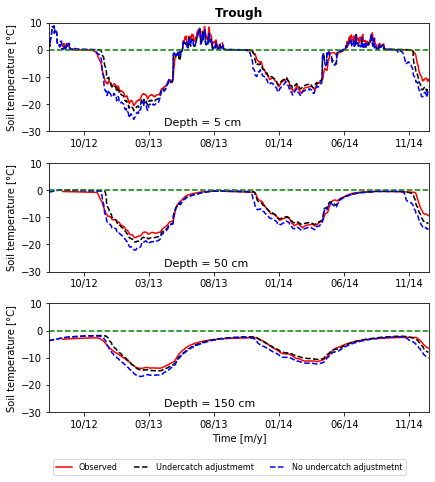

In [103]:
plot_at_depths()

In [104]:

def plot_at_depths_AgingModel(location = 'trough'):
    
    fig, axs = plt.subplots(3,1, figsize=(6,6), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)


    plt.tight_layout()
    axs = axs.ravel()
    Keys = list(DataObserved2013Daily)#.keys()
    Keys_st = []
    xfmt = mdates.DateFormatter('%m/%y')
    
    Vars = ['temperature-trough-5cm','temperature-trough-50cm','temperature-trough-150cm']
    Temp0 = 273.15
    for i in range(0,3):
       
        var = Vars[i]
        axs[i].xaxis.set_major_formatter(xfmt)
        axs[i].set_xticks(DataSim1['Time_f'][::150])

        axs[i].plot(DataObserved2012Daily['time_f'],  DataObserved2012Daily[var]-Temp0,'r',linestyle='-')
        axs[i].plot(DataObserved2013Daily['time_f'],  DataObserved2013Daily[var]-Temp0,'r',linestyle='-')
        axs[i].plot(DataObserved2014Daily['time_f'],  DataObserved2014Daily[var]-Temp0,'r',linestyle='-')
        axs[i].plot(DataObserved2015Daily['time_f'],  DataObserved2015Daily[var]-Temp0,'r',linestyle='-',label='Observed')
        
        axs[i].plot(DataSim1['Time_f'][::1], DataSim1Update[var][::1]-Temp0,'k-',linestyle='--',label='With snow aging model')
        axs[i].plot(DataSim1['Time_f'][::1], DataSim2Update[var][::1]-Temp0,'b-',linestyle='--',label='Without snow aging model')
        
        if i == 0:
            axs[i].set_title('Trough',fontsize=12, fontweight='bold')
            
        axs[i].axhline(y=273.15-Temp0,linestyle='--',color='g')
        axs[i].set_ylim((243.15-Temp0, 283.15-Temp0))
        axs[i].set_ylabel('Soil temperature [\u00B0C]')
        
        axs[i].set_xlim(['2012-08-09','2015-1-1'])
        
        dep=var[var.rfind('-')+1:-2] + ' cm'
        axs[i].text('2013-04-30', -28, 'Depth = %s'%(dep),fontsize=11, fontweight='normal')
        
    
    plt.xlabel('Time [m/y]')
    plt.legend(loc='upper right', fontsize=8, ncol=3, bbox_to_anchor=(0.55,-0.4, .4, .0))
    plt.tight_layout()
    plt.savefig(outfile+'%s-temp-aging-%s.pdf'%(simulation[0] + simulation[1], location), bbox_inches='tight', dpi=100)

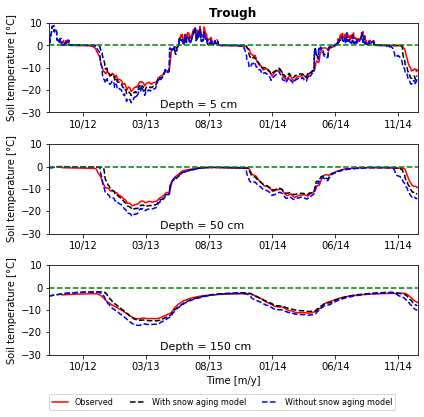

In [105]:
plot_at_depths_AgingModel()